In [ ]:
# # Data Preprocessing
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [101]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/My Drive/intership_2022/ml/project_work/Support vector machine and random forest/Social_Network_Ads.csv')

In [ ]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn
print(sklearn.__version__)

1.0.2


In [ ]:
# importing Dataset from Local drive
from google.colab import files
Uploaded=files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [ ]:
#Print Total number of Rows & columns in dataset
print(dataset.shape)

(400, 5)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
# Extracting dependent and independent variables:
# Extracting independent variable:
X = dataset.iloc[:, 2:4].values
# Extracting dependent variable:
y = dataset.iloc[:, 4].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 24)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

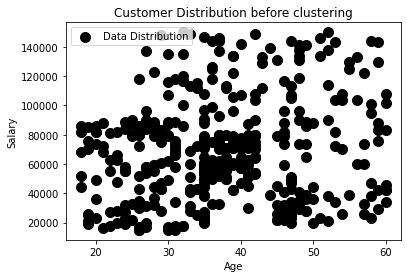

In [ ]:
# Visualising the clusters
plt.scatter(X[:,0], X[:,1], s = 100, c = 'black', label = 'Data Distribution')
plt.title('Customer Distribution before clustering')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: ')
print(cm)

Confusion matrix: 
[[64  5]
 [ 8 23]]


In [ ]:
# calculate Accuracy
# calculate Accuracy
#   0   1
# 0[66  2(FP type 1)]
#1 [8(FN Type 24) 23]
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 87.00


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives) 
# calculate Accuracy
#   0   1
# 0[59  7(FP type 1)]
#1 [ 11(FN Type 2) 23]= 23/30
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %.2f' % (precision))

Precision: 0.82


In [ ]:
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
# calculate Accuracy
#   0   1
# 0[59  7(FP type 1)]
#1 [ 11(FN Type 2) 23]= 23/23+11
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % (recall))

Recall: 0.742


In [ ]:
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# (2*0.829*0.906)/0.829+0.906
# calculate score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

F-Measure: 77.966


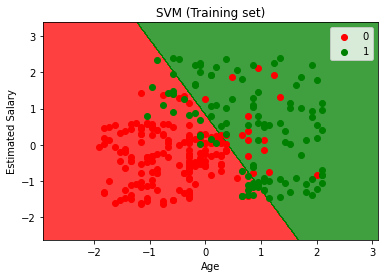

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

we have to cheak another methodes for accuracy

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
classifier.fit(X_train, y_train)

SVC(probability=True, random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 96.00


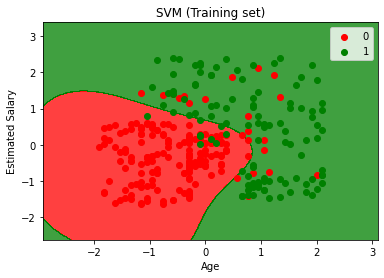

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

again we have to cheak accuracy of this model

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 0, probability=True)
classifier.fit(X_train, y_train)

SVC(kernel='poly', probability=True, random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 87.00


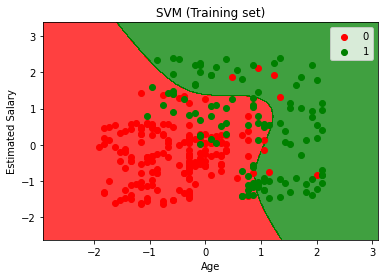

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state = 0, probability=True)
classifier.fit(X_train, y_train)

SVC(kernel='sigmoid', probability=True, random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 71.00


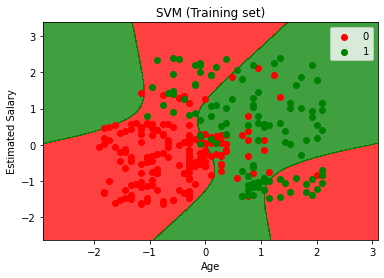

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

we have chosses those who give more accuracy

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
classifier.fit(X_train, y_train)

SVC(probability=True, random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 96.00


In [ ]:
age =  19#@param {type:"number"}
estimated_Salary = 19000 #@param {type:"number"}
variable_name = "12" #@param {type:"string"}

output=classifier.predict(sc.transform([[ age ,estimated_Salary ]]))

print("Purchased =", output)
if output==[1]:
  print( 'Custome will purchase Product')
else:
  print('Customer will not purchase computer')

Purchased = [0]
Customer will not purchase computer


In [ ]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(classifier) 
  
# Load the pickled model 
model = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# save the model to disk
import joblib
filename = '/content/drive/My Drive/intership_2022/ml/project_work/Support vector machine and random forest/svm_model.sav'
joblib.dump(classifier, filename)

['/content/drive/My Drive/intership_2022/ml/project_work/Support vector machine and random forest/svm_model.sav']

In [ ]:
# some time later...
 
# load the model from disk
randomforest_model = joblib.load(filename)
result = randomforest_model.score(X_test, y_test)
print("Result is " , result)

Result is  0.96


In [ ]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(classifier,open('/content/drive/My Drive/intership_2022/ml/project_work/Support vector machine and random forest/svmmodel.pkl', 'wb')) 
# Saving model to disk

[INFO] Saving model...


In [ ]:
# Load the pickled model 
model = pickle.load(open('/content/drive/My Drive/intership_2022/ml/project_work/Support vector machine and random forest/svmmodel.pkl', 'rb'))  
# Use the loaded pickled model to make predictions 
model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

in that ve have predicts random forest algo

In [ ]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_Random = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 24)
classifier_Random.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=24)

In [ ]:
# Predicting the Test set results
y_pred = classifier_Random.predict(X_test)

In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 91.00


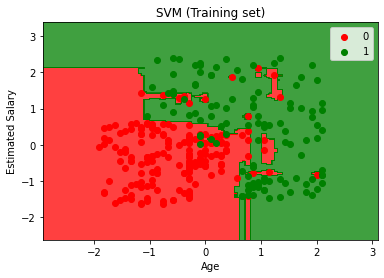

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_Random.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: ')
print(cm)

Confusion matrix: 
[[66  3]
 [ 6 25]]


In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 91.00


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))

Precision: 89.286


In [ ]:
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))

Recall: 80.645


In [ ]:
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

F-Measure: 84.746


In [ ]:
age = 41 #@param {type:"number"}
estimated_Salary = 150000 #@param {type:"number"}
output=classifier.predict(sc.transform([[ age ,estimated_Salary ]]))
print("Perchased =", output)
if output==[1]:
  print( 'Custome will purchase Product')
else:
  print('Customer will not purchase computer')

Perchased = [1]
Custome will purchase Product


In [102]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(classifier_Random,open('/content/drive/My Drive/intership_2022/ml/project_work/Support vector machine and random forest/randomforest.pkl', 'wb')) 
# Saving model to disk

[INFO] Saving model...


In [103]:
# Load the pickled model 
model_1 = pickle.load(open('/content/drive/My Drive/intership_2022/ml/project_work/Support vector machine and random forest/randomforest.pkl', 'rb'))  
# Use the loaded pickled model to make predictions 
model_1.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
!pip install streamlit==1.1.0

In [123]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
st.set_option('deprecation.showfileUploaderEncoding', False)

# Load the pickled model
pickle_in = open("/content/drive/My Drive/intership_2022/ml/project_work/Support vector machine and random forest/svmmodel.pkl","rb")
model=pickle.load(pickle_in)


# Load the pickled model 
model_1 = pickle.load(open('/content/drive/My Drive/intership_2022/ml/project_work/Support vector machine and random forest/randomforest.pkl', 'rb'))  
# Use the loaded pickled model to make predictions 


dataset= pd.read_csv('/content/drive/My Drive/intership_2022/ml/project_work/Support vector machine and random forest/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

def predict_note_authentication(UserID, Gender,Age,EstimatedSalary):
  output= model.predict(sc.transform([[Age,EstimatedSalary]]))
  print("Purchased", output)
  if output==[1]:
    prediction="Item will be purchased"
  else:
    prediction="Item will not be purchased"
  print(prediction)
  return prediction
def predict_random(UserID, Gender,Age,EstimatedSalary):
  output= model_1.predict(sc.transform([[Age,EstimatedSalary]]))
  print("Purchased", output)
  if output==[1]:
    prediction="Item will be purchased"
  else:
    prediction="Item will not be purchased"
  print(prediction)
  return prediction
def main():
    
    html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">Poornima Institute of Engineering & Technology</p></center> 
   <center><p style="font-size:30px;color:white;margin-top:10px;">Department of Computer Engineering</p></center> 
   <center><p style="font-size:25px;color:white;margin-top:10px;"Machine Learning Lab Experiment</p></center> 
   </div>
   </div>
   </div>
   """
    st.markdown(html_temp,unsafe_allow_html=True)
    st.header("Item Purchase Prediction using SVM Algorithm")
    UserID = st.text_input("UserID","")
    Gender = st.selectbox(
    "Gender",
    ("Male", "Female", "Others")
    )
    
    Age = st.number_input('Insert a Age',18,60)
    #Age = st.text_input("Age","Type Here")
    EstimatedSalary = st.number_input("Insert EstimatedSalary",15000,150000)
    resul=""
    if st.button("SVM Prediction"):
      result=predict_note_authentication(UserID, Gender,Age,EstimatedSalary)
      st.success('SVM Model has predicted {}'.format(result))
    if st.button("Random Forest Prediction"):
      result=predict_random(UserID, Gender,Age,EstimatedSalary)
      st.success('Random forest Model  has predicted {}'.format(result))  
    if st.button("About"):
      st.header("Developed by Ishu")
      st.subheader(" Department of Computer Engineering")
    html_temp = """
    <div class="" style="background-color:orange;" >
    <div class="clearfix">           
    <div class="col-md-12">
    <center><p style="font-size:20px;color:white;margin-top:10px;">ML model: Support Vector Machine and Random Forest</p></center> 
    </div>
    </div>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
if __name__=='__main__':
  main()

Overwriting app.py


In [106]:
!nohup streamlit run  app.py &

nohup: appending output to 'nohup.out'


In [111]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
!ngrok authtoken 2CTpOqJJjwgpmRTQYwYiMArgWYm_7SJpoJ22s5w2wU4rVt94s

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [124]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

<NgrokTunnel: "http://36a4-35-227-74-219.ngrok.io" -> "http://localhost:80">

In [ ]:
!streamlit run --server.port 80 app.py

2022-08-02 05:39:46.647 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://35.227.74.219:80



In [ ]:
ngrok.kill()